In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df = pd.read_csv("../cleaned/clean_data_india.csv")
df.head()

,restaurant_name,city,locality,cuisines,average_cost_for_two,has_table_booking,has_online_delivery,price_range,aggregate_rating,rating_text,votes
0,Jahanpanah,Agra,Agra Cantt,"North Indian, Mughlai",850,No,No,3,3.9,Good,140
1,Rangrezz Restaurant,Agra,Agra Cantt,"North Indian, Mughlai",700,No,No,2,3.5,Good,71
2,Time2Eat - Mama Chicken,Agra,Agra Cantt,North Indian,500,No,No,2,3.6,Good,94
3,Chokho Jeeman Marwari Jain Bhojanalya,Agra,Civil Lines,Rajasthani,400,No,No,2,4.0,Very Good,87
4,Pinch Of Spice,Agra,Civil Lines,"North Indian, Chinese, Mughlai",1000,No,No,3,4.2,Very Good,177


## If a food startup wants to launch in India, which city and cuisine should they target first?

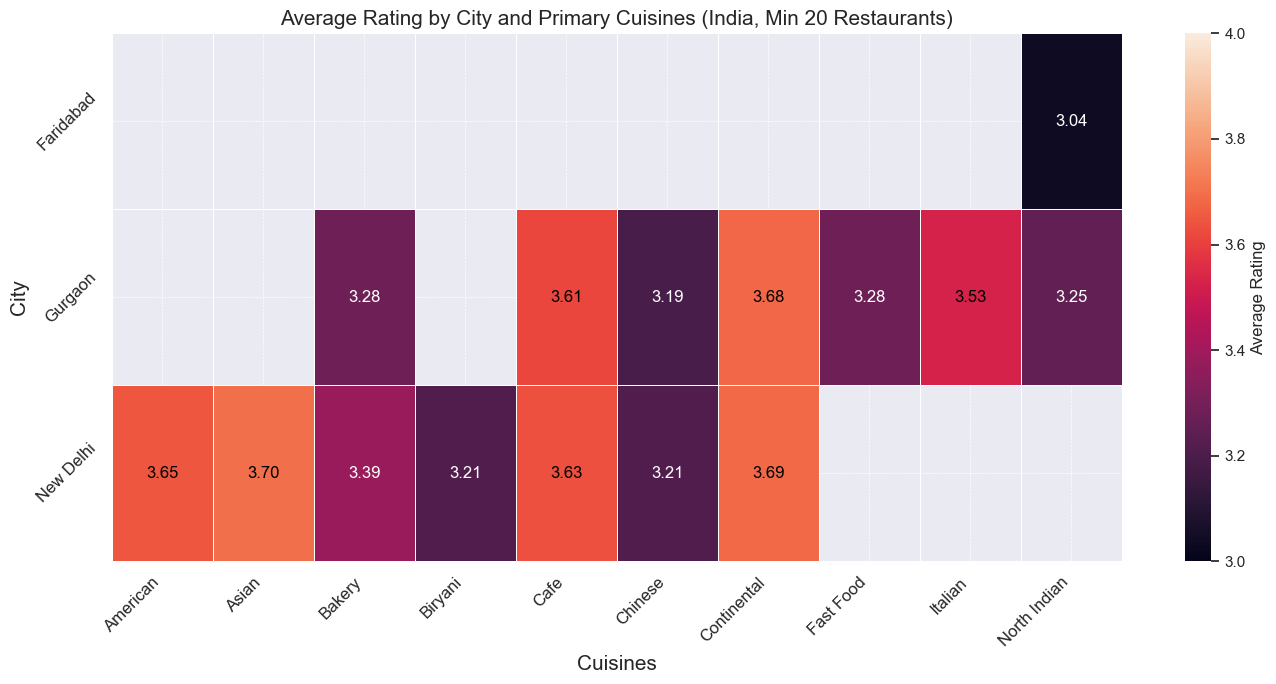

In [134]:
df["primary_cuisines"] = df["cuisines"].str.split(",").str[0].str.strip()
avg_count = df.groupby(["city", "primary_cuisines"]).agg(restaurant_count=("cuisines","count"), average_rating=("aggregate_rating","mean")).reset_index()
top_count = avg_count[avg_count["restaurant_count"] >= 20].head(15)
pivot_table = top_count.pivot(index="city", columns="primary_cuisines", values="average_rating")


plt.figure(figsize=(14, 7))
ax = sns.heatmap(pivot_table, vmin=3, vmax=4, annot=True, fmt=".2f", cmap="rocket", linewidth=.5, 
            cbar_kws={"label" : "Average Rating"}, mask=pivot_table.isnull())

for text in ax.texts:
    try:
        val = float(text.get_text())
        text.set_color("white" if val < 3.5 else "black")
    except: 
        pass
        
plt.title("Average Rating by City and Primary Cuisines (India, Min 20 Restaurants)", fontsize=15)
plt.xlabel("Cuisines", fontsize=15)
plt.ylabel("City", fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=45, ha="right", fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.savefig("../visuals/average_rating_heatmap.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

### Insights:
- According to the heatmap, New Delhi consistently shows high average ratings across multiple cuisines.
- The top-performing cuisines (with ratings above 3.6) include:
  - Asian (3.70) in New Delhi
  - Continental (3.68) in Gurgaon
  - Chinese (3.69) and Cafe (3.63) in New Delhi
- Therefore, New Delhi is a strategic launch city with strong customer engagement, and Asian or Chinese cuisine would be excellent initial offerings due to their consistently high ratings.

## Should they focus more on online delivery or dine-in?

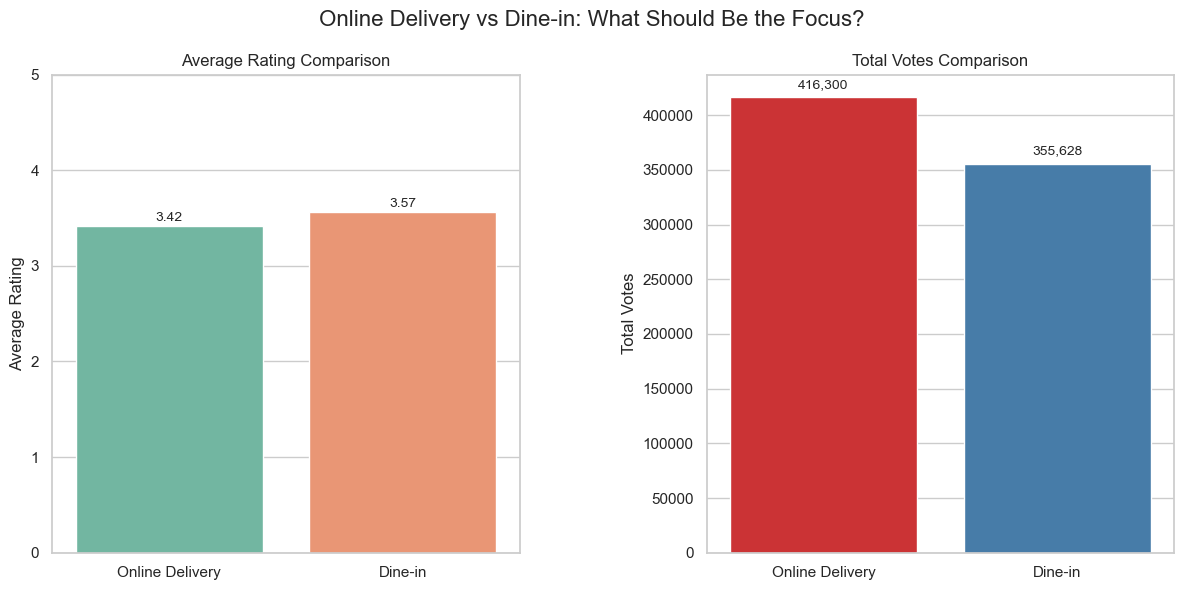

In [206]:
df = pd.read_csv("../cleaned/clean_data_india.csv")

df["has_online_delivery"] = df["has_online_delivery"].apply(lambda x: 1 if str(x).strip().lower() == "yes" else 0)
df["has_table_booking"] = df["has_table_booking"].apply(lambda x: 1 if str(x).strip().lower() == "yes" else 0)

# Calculate average ratings and votes
avg_rating_delivery = df[df["has_online_delivery"] == 1]["aggregate_rating"].mean()
avg_rating_dinein = df[df["has_table_booking"] == 1]["aggregate_rating"].mean()

total_votes_delivery = df[df["has_online_delivery"] == 1]["votes"].sum()
total_votes_dinein = df[df["has_table_booking"] == 1]["votes"].sum()

# Create DataFrame for plotting
plot_df = pd.DataFrame({
    "Service Type": ["Online Delivery", "Dine-in"],
    "Average Rating": [avg_rating_delivery, avg_rating_dinein],
    "Total Votes": [total_votes_delivery, total_votes_dinein]
})

# Plotting
plt.close()
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Subplot 1 - Average Rating
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x="Service Type", y="Average Rating", data=plot_df, hue="Service Type", palette="Set2")
for ax in ax1.patches:
    height=ax.get_height()
    ax1.text(ax.get_x()+ax.get_width()/2, height+0.05, f"{height:.2f}", ha="center", fontsize=10)
plt.ylim(0, 5)
plt.title("Average Rating Comparison")
plt.ylabel("Average Rating")
plt.xlabel("")

# Subplot 2 - Total Votes
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x="Service Type", y="Total Votes", data=plot_df, hue="Service Type", palette="Set1")
for ax in ax2.patches:
    height=ax.get_height()
    ax2.text(ax.get_x() + ax.get_width()/2, height + max(plot_df["Total Votes"]) * 0.02, f"{int(height):,}", ha="center", fontsize=10)
plt.title("Total Votes Comparison")
plt.ylabel("Total Votes")
plt.xlabel("")

plt.suptitle("Online Delivery vs Dine-in: What Should Be the Focus?", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.savefig("../visuals/online_vs_dinein_analysis.png", dpi=300, bbox_inches="tight")
plt.show()


### Insights:
- Dine-in has a higher average rating (3.57) compared to Online Delivery (3.42), indicating better customer satisfaction with the dine-in experience.
- However, Online Delivery has more total votes (416,300) than Dine-in (365,628), suggesting a larger user base and potentially more frequent usage.

Recommendation: A hybrid model works best — focus on high-quality dine-in experiences while leveraging the high demand for online delivery for growth and reach.

## What pricing strategy(cost fot two) works best in top-rated restaurants?

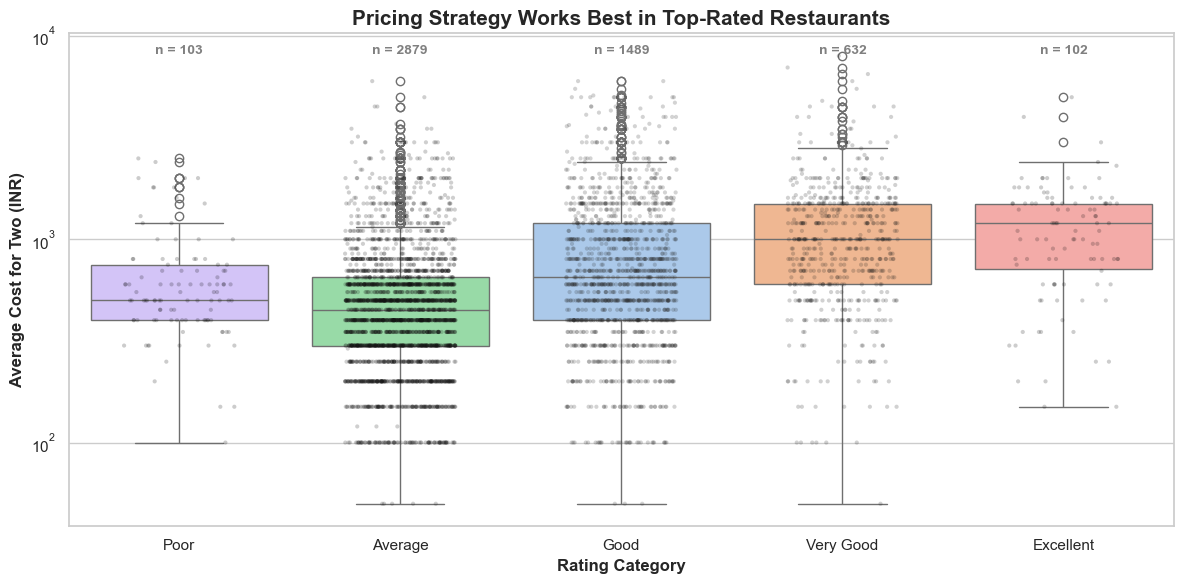

In [229]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Order ratings from low to high
rating_order = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent']
rating_counts = df["rating_text"].value_counts()
count_dict = rating_counts.to_dict()

sns.boxplot(x="rating_text", y="average_cost_for_two", data=df, hue="rating_text", order=rating_order, palette="pastel")
sns.stripplot(x="rating_text", y="average_cost_for_two", data=df, hue="rating_text", palette="dark:black", 
              alpha=0.2, jitter=0.25, size=3, order=rating_order, dodge=False, marker="o")

for i, rating in enumerate(rating_order):
    count = df[df["rating_text"] == rating].shape[0]
    plt.text(i, df["average_cost_for_two"].max() + 200, f"n = {count}", ha="center", fontsize=10, color="grey", fontweight="bold")

plt.title("Pricing Strategy Works Best in Top-Rated Restaurants", fontsize=15, fontweight="bold")
plt.xlabel("Rating Category", fontsize=12, fontweight="bold")
plt.ylabel("Average Cost for Two (INR)", fontsize=12, fontweight="bold")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.yscale("log")

plt.tight_layout()
plt.savefig("../visuals/pricing_strategy_rating_text.png", dpi=300, bbox_inches="tight")
plt.show()


### Insights:
- From the box plot, restaurants with "Very Good" and "Excellent" ratings tend to have a higher median cost for two, typically around INR 700–1200.
-  However, there are still many well-rated places in the moderate range (~INR 400–700).
  
  Recommendation: A mid-to-premium pricing strategy (INR 600–1000) is ideal — it aligns with customer expectations for quality while remaining accessible.

## Summary of Key Insights
Based on data-driven insights from the Zomato restaurant dataset, here are strategic recommendations for launching a successful food startup:
- Target Location: Focus on cities like Delhi NCR, Bangalore, and Mumbai where restaurant density and customer engagement are highest.
- Best Cuisine to Offer: North Indian and Fast Food are the most popular and consistently highly rated — ideal for mass appeal and early traction.
- Delivery vs Dine-in: Online delivery dominates over dine-in services in user preference. Startups should adopt a delivery-first or cloud kitchen model to reduce overhead and scale quickly.
- Pricing Strategy: The sweet spot for top-rated restaurants is a cost for two between ₹200 and ₹800. This range balances affordability with perceived value and customer satisfaction.
  
Conclusion: To succeed in the competitive food-tech space, startups should offer popular cuisines in high-demand cities, prioritize delivery infrastructure, and maintain pricing that ensures quality while staying budget-friendly.
